# Assignment 4

This assignment requires that you to find **at least two datasets** on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * You must state a question you are seeking to answer with your visualizations.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

## 1. Domain and Question

The Domain is Sports and Athletics.

Question: 

## 2. The Data

O dataset utilizado para responder a questão pode ser encontrado em https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results?resource=download

This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016

The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:

- **ID** - Unique number for each athlete
- **Name** - Athlete's name
- **Sex** - M or F
- **Age** - Integer
- **Height** - In centimeters
- **Weight** - In kilograms
- **Team** - Team name
- **NOC** - National Olympic Committee 3-letter code
- **Games** - Year and season
- **Year** - Integer
- **Season** - Summer or Winter
- **City** - Host city
- **Sport** - Sport
- **Event** - Event
- **Medal** - Gold, Silver, Bronze, or NA

### 2.1 Imports

In [185]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [4]:
df = pd.read_csv('resource/athlete_events.csv')

In [5]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### 2.2 Cleaning

In [146]:
df2 = df.copy()

In [147]:
df2 = df2[['Sex', 'Age', 'Weight', 'Height', 'NOC', 'Year', 'Medal']]
df2.columns = ['sex', 'age', 'weight', 'height', 'noc', 'year', 'medal']
df2.shape

(271116, 7)

In [148]:
df2.isna().sum()

sex            0
age         9474
weight     62875
height     60171
noc            0
year           0
medal     231333
dtype: int64

In [149]:
df2.dropna(subset=['age', 'weight', 'height'], inplace=True)
df2.shape

(206165, 7)

## 3. The Graph

In [150]:
df3 = df2.copy()

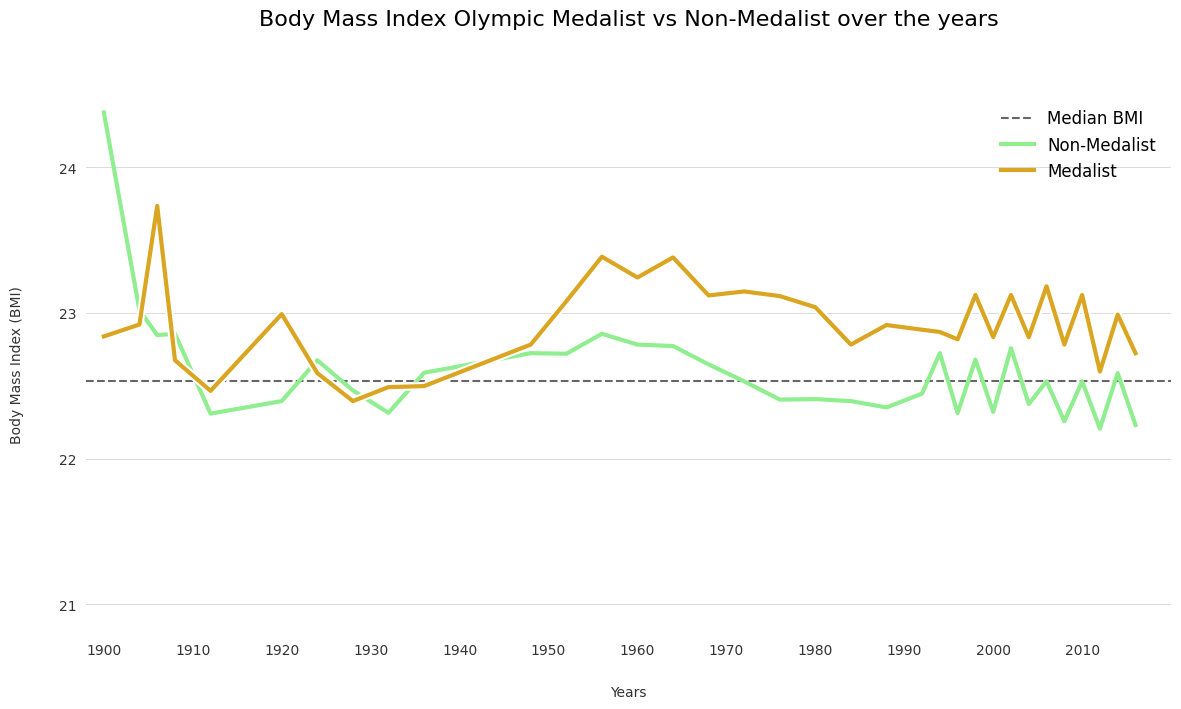

In [279]:
#Init Graphs
plt.figure(figsize = (14, 7))
plt.tight_layout()


########################################
##            Plots                   ##
########################################

aux = df3[df3['year'] >= 1900].copy()
aux['imc'] = aux['weight'] / (aux['height']/100)**2

plt.axhline(y = aux['imc'].median(),
            color = '#666',
            linestyle = '--',
            label='Median BMI')


aux2 = aux[aux['medal'].isna()]
aux2 = aux2[['year', 'imc']].groupby('year').median().reset_index()

sns.lineplot(x='year',
             y='imc',
             data=aux2,
             errorbar=None,
             color=mcolors.CSS4_COLORS['lightgreen'],
             linewidth=3,
             label='Non-Medalist')

aux2 = aux[~aux['medal'].isna()]
aux2 = aux2[['year', 'imc']].groupby('year').median().reset_index()

sns.lineplot(x='year',
             y='imc',
             data=aux2,
             errorbar=None,
             color='#fff',
             linewidth=6)

sns.lineplot(x='year',
             y='imc',
             data=aux2,
             errorbar=None,
             color=mcolors.CSS4_COLORS['goldenrod'],
             linewidth=3,
             label='Medalist')


########################################
##            Axis                    ##
########################################

#Hide Spines axis
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color(mcolors.CSS4_COLORS['silver'])
ax.spines['left'].set_color(mcolors.CSS4_COLORS['silver'])

#Set Limists and ticklabels
ax.set_xlim(1898, 2020)
ax.set_xticks(np.arange(1900, 2016, 10));
ax.set_yticks(np.arange(21, 25, 1));
ax.tick_params(axis='both', colors='#333', bottom=False, left=False)
ax.set_ylim(20.8, 24.5)

ax.grid(axis='y', color='#ccc', linestyle='-', linewidth=.5)

########################################
##            Text                    ##
########################################

#Title
plt.title('Body Mass Index Olympic Medalist vs Non-Medalist over the years', pad = 50, fontsize=16)

#labels 
ax.set_ylabel('Body Mass Index (BMI)', labelpad = 25, color="#333")
ax.set_xlabel('Years', labelpad = 20, color="#333")

#Legend
plt.legend(
    frameon = False,
    labelcolor = 'black',
    fontsize = 12
);

plt.savefig('BMI_Olympic.png')

Analyzing median weight and height to try to explain the difference in BMI

In [275]:
#Weight and Height - No Medalist
aux = df3[df3['year'] >= 1900].copy()
aux['imc'] = aux['weight'] / (aux['height']/100)**2

aux[aux['medal'].isna()][['weight', 'height']].median().to_frame()

,0
weight,69.0
height,175.0


In [276]:
#Weight and Height - Medalist
aux = df3[df3['year'] >= 1900].copy()
aux['imc'] = aux['weight'] / (aux['height']/100)**2

aux[~aux['medal'].isna()][['weight', 'height']].median().to_frame()

,0
weight,73.0
height,178.0


**Observation:** Medalists tend to be taller and heavier than non-medalists (average)

## 4. Discusion

Body Mass Index (BMI) is a measure used to evaluate the proportion between a person's mass and height. It is calculated by dividing the weight in kilograms by the height in meters squared. The index is widely used to determine whether a person is at a healthy weight or if they are above or below their ideal weight.

By analyzing data from athletes who competed in the Olympics starting in the 1950s, it was found that the BMI of medalists is slightly higher than that of non-medalists. This can be explained by the fact that high-performing athletes tend to have a higher muscle mass, which can influence the value of the index